In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [2]:
pyplot.rcParams['font.family']= 'serif'
pyplot.rcParams['font.size'] = 16

In [3]:
def rho_green_light(x, rho_light):
    rho = numpy.zeros_like(x)
    mask = numpy.where(x < 2.0)
    rho[mask] = rho_light*x[mask]/2.0
    return rho

In [4]:
nx = 81
L = 4.0
dx = L/(nx-1)
nt = 30
u_max = 1.0
rho_max = 10.0
rho_light  = 10.0

x = numpy.linspace(0.0, L, num = nx)

rho0 = rho_green_light(x, rho_light)

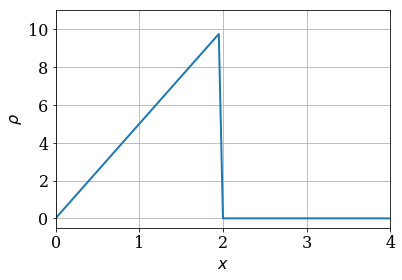

In [5]:
pyplot.figure(figsize = (6.0, 4.0))

pyplot.xlabel(r'$x$')
pyplot.ylabel(r'$\rho$')
pyplot.grid()
pyplot.plot(x, rho0, color='C0', linestyle='-', linewidth=2)
pyplot.xlim(0.0, L)
pyplot.ylim(-0.5, 11.0);              

In [6]:
def flux(rho, u_max, rho_max):
    F = rho*u_max*(1.0 - rho/rho_max)
    return F 

In [7]:
def ftbs():
    rho_hist= [rho0.copy()]
    rho = rho0.copy()
    for n in range(nt):
        F = flux(rho, *args)
        rho[1:]= rho[1:]-dt/dx*(F[1:]-F[:-1])
        rho[0] = bc_value
        rho_hist.append(rho.copy())
        return rho_hist

In [8]:
import numpy
from matplotlib import pyplot
%matplotlib inline


In [9]:
pyplot.rcParams['font.family'] = 'serif'
pyplot. rcParams['font.size'] = 16

In [10]:
def rho_red_light(x, rho_max):
    rho = rho_max*numpy.ones_like(x)
    mask = numpy.where(x < 3.0)
    rho[mask] = 0.5*rho_max
    return rho

In [11]:
nx = 81
L = 4.0
dx = L/(nx-1)
nt = 40
rho_max = 10.0
u_max = 1.0

x = numpy.linspace(0.0, L, num = nx)

rho0 = rho_red_light(x, rho_max)

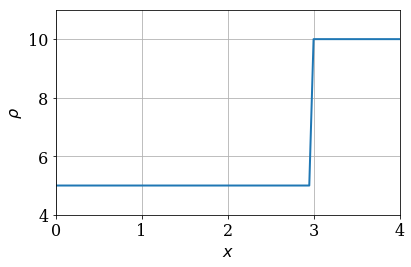

In [12]:
fig = pyplot.figure(figsize=(6.0, 4.0))
pyplot.xlabel(r'$x$')
pyplot.ylabel(r'$\rho$')
pyplot.grid()
line = pyplot.plot(x, rho0,
                   color='C0', linestyle='-', linewidth=2)[0]
pyplot.xlim(0.0, L)
pyplot.ylim(4.0, 11.0)
pyplot.tight_layout()

In [13]:
def flux(rho, u_max, rho_max):
    F = rho*u_max*(1.0-rho/rho_max)
    return F

In [14]:
def LF():
    rho_hist = [rho0.copy()]
    rho = rho0.copy()
    for n in range(nt):
        F = flux(rho, *args)
        rho[1:-1] = 0.5*(rho[2:]+rho[-2:]) - dt/(dx*2.0)*(F[2:]-F[:-2])
        rho[0] = bc_values[0]
        rho[-1] = bc_values[-1]
        rho_hist.append(rho.copy())
        return rho_hist

In [15]:
def jacobian(rho, u_max, rho_max):
    J = u_max*(1-2.0*rho/rho_max)
    return J

In [16]:
def LW():
    rho_hist = [rho0.copy()]
    rho = rho0.copy
    for n in range(nt):
        F = flux(rhjo, *args)
        J = jacobian(rho, *args)
        

In [17]:
def rho_ST(x, rho0_L, rho0_R):
    rho = numpy.ones_like(x)
    mask_1 = numpy.where(x < 0.0)
    mask_2 = numpy.where(0.0 <= x)
    rho[mask_1] = rho0_L
    rho[mask_2] = rho0_R
    return rho

In [18]:
def u_ST(x, u0_L, u0_R):
    u = numpy.ones_like(x)
    mask_1 = numpy.where(x < 0.0)
    mask_2 = numpy.where(0.0 <= x)
    u[mask_1] = u0_L
    u[mask_2] = u0_R
    return u

In [19]:
def p_ST(x, p0_L, p0_R):
    p = numpy.ones_like(x)
    mask_1 = numpy.where(x < 0.0)
    mask_2 = numpy.where(0.0 <= x)
    p[mask_1] = p0_L
    p[mask_2] = p0_R
    return p

In [20]:
nx = 81
L = 10.0
dx = 0.25
dt = 0.0002
gamma = 1.4
rho0_L = 1.0
rho0_R = 0.125
u0_L = 0.0
u0_R = 0.0
p0_L = 100000.0
p0_R = 10000.0
nt = 50

x = numpy.linspace(-L, L, num=nx)

rho0 = rho_ST(x, rho0_L, rho0_R)
u0 = u_ST(x, u0_L, u0_R)
p0 = p_ST(x, p0_L, p0_R)

In [21]:
def e_EOS(p, rho, gamma):
    e = p / ((gamma - 1) * rho)
    return e

In [22]:
e0 = e_EOS(p0, rho0, gamma)

In [23]:
def u_vec(rho, e, u):
    UV = numpy.empty([3, 81])
    UV[0, :] = rho
    UV[1, :] = u * rho
    UV[2, :] = rho * (e + u**2 / 2)
    return UV

In [24]:
UV0 = u_vec(rho0, e0, u0)

In [25]:
def flux(UV, gamma):
    f = numpy.empty([3, 81])
    f[0] = UV[1]
    f[1] = UV[1]**2 / UV[0] + (gamma - 1) * (UV[2] - 0.5 * UV[1]**2 / UV[0])
    f[2] = (UV[2] + (gamma - 1) * (UV[2] - 0.5 * UV[1]**2 / UV[0])) * (UV[1] / UV[0])
    return f

In [26]:
def RM(UV0, nt, gamma, dt, dx, bc_values):
    UV = UV0.copy()
    UV_new = UV.copy()
    for n in range(nt):
        f = flux(UV, gamma)
        UV_new[:,1:-1] = 0.5 * (UV[:,2:] + UV[:,1:-1]) - (dt / (2*dx)) * (f[:,2:] - f[:,1:-1])
        f = flux(UV_new, gamma)
        UV[:,1:-1] = UV[:,1:-1] - dt / dx * (f[:,1:-1] - f[:,:-2])
        UV[:,0] = bc_values[0]
        UV[:,-1] = bc_values[1]
    return UV

In [27]:
u_new = RM(UV0, nt, gamma, dt, dx, (UV0[:, 0], UV0[:, -1]))
vel = u_new[1] / u_new[0]
pressure = (gamma - 1) * (u_new[2] - 0.5 * u_new[1]**2 / u_new[0])
density = u_new[0]

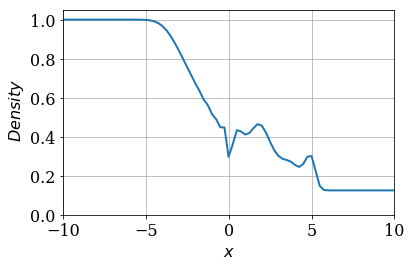

In [28]:


pyplot.xlabel(r'$x$')
pyplot.ylabel(r'$\ Density$')
pyplot.grid()
line = pyplot.plot(x, density,
                   color='C0', linestyle='-', linewidth=2)[0]
pyplot.xlim(-L, L)
pyplot.ylim(0.0, 1.05)
pyplot.tight_layout()